# Análisis Exploratorio (EDA) Proyecto Banco usando Clustering (K-Means Clustering)

**1. Importación de las Bibliotecas**

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sweetviz as sw


**Cargar el dataset**

In [86]:
df = pd.read_csv('bank_dataset.CSV', header=0, delimiter= ",")

**Mostrar la estructura del dataset**

In [87]:
df.shape

(11162, 17)

EL resultado indica que existen 11162 filas y 17 columnas

**Muestro el contenido de las primeras filas del dataset**

In [88]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59.0,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56.0,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41.0,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55.0,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54.0,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


Información general del dataset (tipo de datos de cada columna)

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        11152 non-null  float64
 1   job        11162 non-null  object 
 2   marital    11157 non-null  object 
 3   education  11155 non-null  object 
 4   default    11162 non-null  object 
 5   balance    11162 non-null  int64  
 6   housing    11162 non-null  object 
 7   loan       11162 non-null  object 
 8   contact    11162 non-null  object 
 9   day        11162 non-null  int64  
 10  month      11162 non-null  object 
 11  duration   11162 non-null  int64  
 12  campaign   11162 non-null  int64  
 13  pdays      11162 non-null  int64  
 14  previous   11162 non-null  int64  
 15  poutcome   11162 non-null  object 
 16  deposit    11162 non-null  object 
dtypes: float64(1), int64(6), object(10)
memory usage: 1.4+ MB


**Información estadística de cada columna**

In [90]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11152.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.235384,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.914934,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


**Histograma que muestra la distribución de los datos en las variables numéricas**

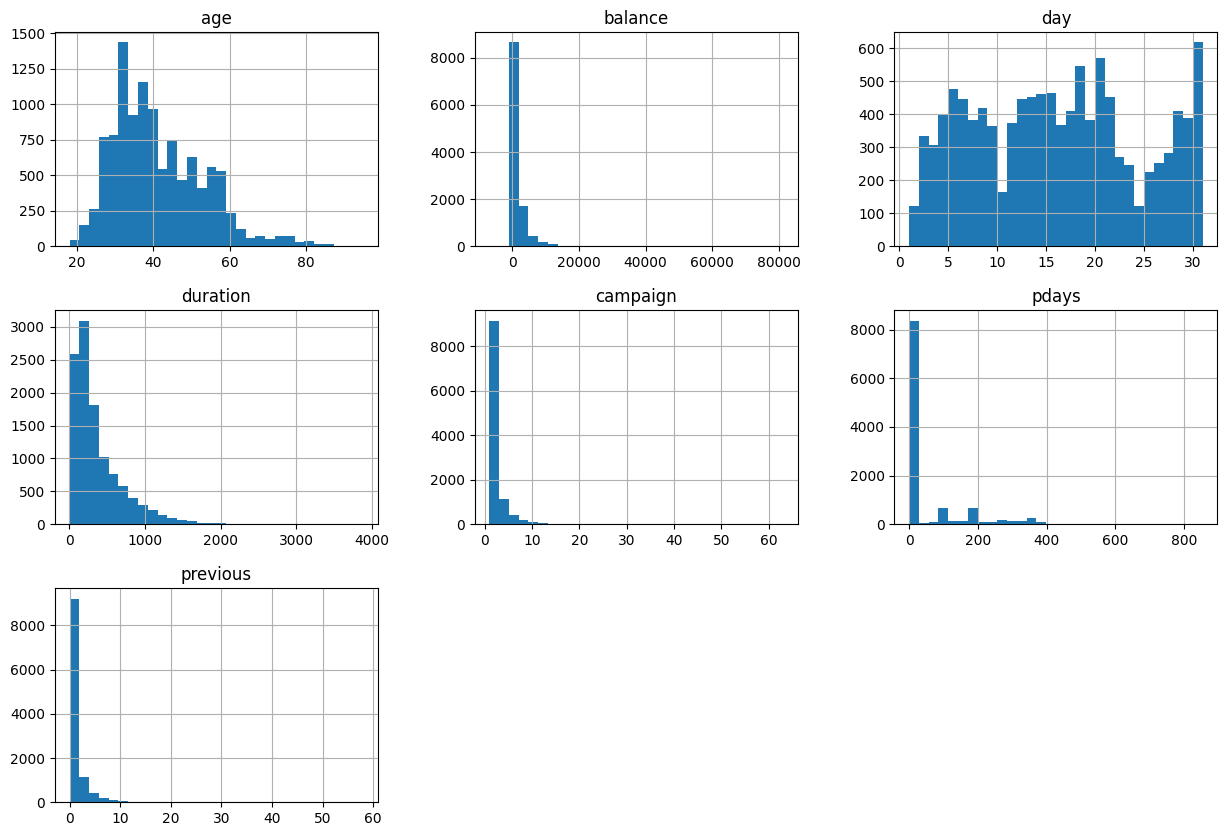

In [91]:
df.hist(bins=30, figsize=(15, 10))
plt.show()

**Contar los valores de cada variable categórica**

In [92]:
for column in df.select_dtypes(include=['object']).columns:
    print(f"Variable {column}: {df[column].nunique()} categorías\
    \n{df[column].value_counts()}\
    \n \n------------------------\n")



Variable job: 12 categorías    
job
management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: count, dtype: int64    
 
------------------------

Variable marital: 3 categorías    
marital
married     6349
single      3517
divorced    1291
Name: count, dtype: int64    
 
------------------------

Variable education: 4 categorías    
education
secondary    5474
tertiary     3685
primary      1500
unknown       496
Name: count, dtype: int64    
 
------------------------

Variable default: 2 categorías    
default
no     10994
yes      168
Name: count, dtype: int64    
 
------------------------

Variable housing: 2 categorías    
housing
no     5881
yes    5281
Name: count, dtype: int64    
 
------------------------

Variable loan: 2 categorías    
loan
no     9702
yes    1460


## **Visualización de los valores nulos en el dataset**

In [93]:
df.isnull().sum()

age          10
job           0
marital       5
education     7
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
deposit       0
dtype: int64

En el dataset las siguientes columnas tiene valores nulos:

- age: 10
- marital: 5
- education: 7

Estos valores nulos pertenecen a variables que utilizaré durante el proyecto, por tanto trabajaré en sustituir los valores faltantes.

En primer lugar los filtraré por variable para saber como trabajar con la imputación de los valores nulos.

## Detalle de los Valores Nulos en la Variable `Age`

In [94]:
nulos_age = df['age'].isnull()
df[nulos_age]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
1181,NaN,management,married,tertiary,no,309,yes,no,cellular,5,feb,676,1,-1,0,unknown,yes
1410,NaN,blue-collar,married,primary,no,4979,no,no,telephone,6,apr,180,1,-1,0,unknown,yes
4019,NaN,services,single,secondary,no,1934,no,no,cellular,29,sep,271,1,-1,0,unknown,yes
5680,NaN,technician,single,tertiary,no,720,no,no,cellular,12,aug,234,4,-1,0,unknown,no
6763,NaN,technician,single,tertiary,no,686,yes,no,unknown,30,may,98,2,-1,0,unknown,no
8419,NaN,blue-collar,married,secondary,no,1782,yes,no,unknown,19,jun,549,1,-1,0,unknown,no
9470,NaN,management,married,tertiary,no,552,no,no,cellular,28,jul,761,8,-1,0,unknown,no
9552,NaN,admin.,married,secondary,no,1648,yes,no,cellular,19,nov,172,3,-1,0,unknown,no
9751,NaN,services,married,primary,no,2567,yes,no,cellular,14,may,109,1,360,2,failure,no
10678,NaN,technician,divorced,tertiary,no,0,yes,no,cellular,2,jun,72,1,-1,0,unknown,no


**En el caso de age utilizaré la media de marital para completar los valores faltantes**

In [95]:
avg_ages = df.groupby("marital")["age"].mean().round()

for status, avg_age in avg_ages.items():
    df.loc[(df["marital"] == status) & (df["age"].isna()), "age"] = avg_age

**Comprobación de la imputación satisfactoría de los datos en `AGE`**

In [96]:
df[nulos_age]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
1181,45.0,management,married,tertiary,no,309,yes,no,cellular,5,feb,676,1,-1,0,unknown,yes
1410,45.0,blue-collar,married,primary,no,4979,no,no,telephone,6,apr,180,1,-1,0,unknown,yes
4019,33.0,services,single,secondary,no,1934,no,no,cellular,29,sep,271,1,-1,0,unknown,yes
5680,33.0,technician,single,tertiary,no,720,no,no,cellular,12,aug,234,4,-1,0,unknown,no
6763,33.0,technician,single,tertiary,no,686,yes,no,unknown,30,may,98,2,-1,0,unknown,no
8419,45.0,blue-collar,married,secondary,no,1782,yes,no,unknown,19,jun,549,1,-1,0,unknown,no
9470,45.0,management,married,tertiary,no,552,no,no,cellular,28,jul,761,8,-1,0,unknown,no
9552,45.0,admin.,married,secondary,no,1648,yes,no,cellular,19,nov,172,3,-1,0,unknown,no
9751,45.0,services,married,primary,no,2567,yes,no,cellular,14,may,109,1,360,2,failure,no
10678,47.0,technician,divorced,tertiary,no,0,yes,no,cellular,2,jun,72,1,-1,0,unknown,no


# Detalle de los Valores Nulos en la Variable `Marital`

In [97]:
nulos_marital = df['marital'].isnull()
df[nulos_marital]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
1088,53.0,management,NaN,secondary,no,1004,no,yes,telephone,22,dec,119,1,-1,0,unknown,yes
3719,68.0,retired,NaN,secondary,no,4189,no,no,telephone,14,jul,897,2,-1,0,unknown,yes
4854,34.0,management,NaN,tertiary,no,5,no,no,cellular,18,aug,370,2,-1,0,unknown,yes
6701,60.0,admin.,NaN,primary,no,-444,no,yes,cellular,16,jul,227,1,-1,0,unknown,no
9272,30.0,blue-collar,NaN,primary,no,35,yes,no,cellular,11,jul,366,2,-1,0,unknown,no


Para imputar los valores nulos de la variable `Marital` utilizaré la moda teniendo como referencia las variables `job` y `age`

In [98]:
moda_marital = df.groupby(['job', 'age'])['marital'].transform(lambda x: x.mode()[0] if not x.isnull().all() else None)
df['marital'] = df['marital'].fillna(moda_marital)

Comprobación de la imputación satisfactoría de los datos en marital

In [99]:
df[nulos_marital]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
1088,53.0,management,married,secondary,no,1004,no,yes,telephone,22,dec,119,1,-1,0,unknown,yes
3719,68.0,retired,married,secondary,no,4189,no,no,telephone,14,jul,897,2,-1,0,unknown,yes
4854,34.0,management,married,tertiary,no,5,no,no,cellular,18,aug,370,2,-1,0,unknown,yes
6701,60.0,admin.,married,primary,no,-444,no,yes,cellular,16,jul,227,1,-1,0,unknown,no
9272,30.0,blue-collar,single,primary,no,35,yes,no,cellular,11,jul,366,2,-1,0,unknown,no


# Detalle de los Valores Nulos en la Variable `Education`

In [100]:
nulos_education = df['education'].isnull()
df[nulos_education]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
1300,37.0,technician,married,NaN,no,549,no,no,cellular,2,mar,239,1,-1,0,unknown,yes
2943,24.0,student,single,NaN,no,382,no,no,cellular,13,nov,256,2,92,3,failure,yes
4737,37.0,management,single,NaN,no,102,yes,no,cellular,6,may,445,1,258,2,failure,yes
6819,32.0,services,married,NaN,no,-344,no,yes,cellular,4,feb,44,1,-1,0,unknown,no
7121,57.0,entrepreneur,married,NaN,no,657,no,no,unknown,12,jun,344,1,-1,0,unknown,no
8592,55.0,management,single,NaN,no,797,no,no,cellular,29,jul,24,2,-1,0,unknown,no
9406,32.0,technician,single,NaN,no,696,no,yes,cellular,13,aug,101,4,105,4,failure,no


In [101]:
moda_education = df.groupby(['job', 'age'])['education'].transform(lambda x: x.mode()[0] if not x.isnull().all() else None)
df['education'] = df['education'].fillna(moda_education)

Comprobación de la imputación satisfactoría de los datos en education

In [102]:
df[nulos_education]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
1300,37.0,technician,married,secondary,no,549,no,no,cellular,2,mar,239,1,-1,0,unknown,yes
2943,24.0,student,single,secondary,no,382,no,no,cellular,13,nov,256,2,92,3,failure,yes
4737,37.0,management,single,tertiary,no,102,yes,no,cellular,6,may,445,1,258,2,failure,yes
6819,32.0,services,married,secondary,no,-344,no,yes,cellular,4,feb,44,1,-1,0,unknown,no
7121,57.0,entrepreneur,married,secondary,no,657,no,no,unknown,12,jun,344,1,-1,0,unknown,no
8592,55.0,management,single,tertiary,no,797,no,no,cellular,29,jul,24,2,-1,0,unknown,no
9406,32.0,technician,single,secondary,no,696,no,yes,cellular,13,aug,101,4,105,4,failure,no


Comprobación final de que no existen valores nulos en el dataset

In [103]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

Dentro de mi proyecto tengo la intención de utilizar básicamente los datos demográficos de los clientes y los datos financieros relevantes para que pueda crearse una clasificación de clientes, por lo que algunas variables no considero necesarias estudiarlas con detenimiento e incluso decido eliminar aquellas que no son de utilidad para el propósito de este proyecto (las relacionadas con el historial de contacto)

Antes de mirar los outliers presentes, realizo las siguientes consideraciones previas:

- Descarto las columnas `contact`, `day`, `month`, `duration`, `campaign`, `pdays`, `previous`, `poutcome`

- En la variable `age` observo también que los valores dentro de esta presentan números decimales y es del tipo (float); no tiene sentido que se mantenga así y cambio el tipo a (int)

Elimino las variables/columnas que no necesito

In [104]:
df = df[['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'deposit']]

Tratamiento del tipo en la variable `Age`

In [105]:
df['age'] = df['age'].astype('int')

Compruebo que el cambio ha sido realizado correctamente

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int32 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   deposit    11162 non-null  object
dtypes: int32(1), int64(1), object(7)
memory usage: 741.4+ KB


Utilizo un boxplot para tener una visualización de la distribución de los valores de esta variable.

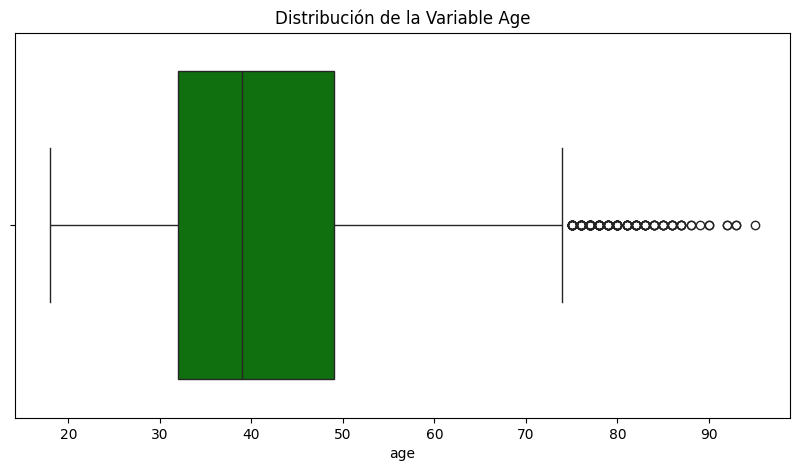

In [107]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df['age'], orient='h', color='green')
plt.title('Distribución de la Variable Age')
plt.show()

Como resultado de esta visualización observo que existen valores que se encuentran fuera de rango y creo que puedo profundizar más y saber si pueden estar relacionados con algún error de imputación o de otra índole.

Utilizaré la identificación de estos outliers (`edad`) mediante el método de IQR

In [108]:
# Percentiles
Q3 = df['age'].quantile(0.75)
Q1 = df['age'].quantile(0.25)

# IQR
IQR = Q3 - Q1

# Umbrales
superior = Q3 + (1.5 * IQR)
inferior = Q1 - (1.5 * IQR)
 
outliers_edad = df[(df['age'] < inferior) | (df['age'] > superior)]
outliers_edad

,age,job,marital,education,default,balance,housing,loan,deposit
1162,75,retired,divorced,primary,no,3881,yes,no,yes
1236,85,retired,married,primary,no,12114,no,no,yes
1243,90,retired,divorced,secondary,no,1,no,no,yes
1274,85,retired,divorced,primary,no,7613,no,no,yes
1320,83,retired,divorced,primary,no,1097,no,no,yes
...,...,...,...,...,...,...,...,...,...
10438,77,retired,married,primary,no,1492,no,no,no
10562,88,retired,married,primary,no,648,no,no,no
10570,77,unknown,married,unknown,no,397,no,no,no
10618,78,retired,married,primary,no,680,no,no,no


In [109]:
print(f'La cantidad de outliers en la variable: {len(outliers_edad)}')

La cantidad de outliers en la variable: 171


Investigo un poco más sobre los outliers del rango superior, porque en el resultado observo que hay valores 1 en deposit(han contratado un deposito con el banco), filtro los resultados considerando que si hayan contratado el instrumento de la campaña telefónica.

In [110]:
outliers_superior = df[df['age'] > superior]

outliers_deposit_superior_1 = outliers_superior[outliers_superior['deposit'] == "yes"]['deposit'].count()

print(f'Outliers con Deposit Contratado(yes): {(outliers_deposit_superior_1)}')

Outliers con Deposit Contratado(yes): 132


Al observar la cantidad de clientes del rango superior que si han contratado (con los datos que se tienen), decido conservarlos. Aunque en algunos casos sería interesante poder saber desde la fuente de los datos si estos clientes son reales y no provienen de algún tipo de error de captura o imputación. A los efectos del objetivo de este proyecto, mantendré a este grupo de edad para categorizarlo, que pueda tenerse en cuenta dentro de los perfiles que se puedan crear y ofrecerles productos específicos. 

Distribución de outliers en la Variable `balance`

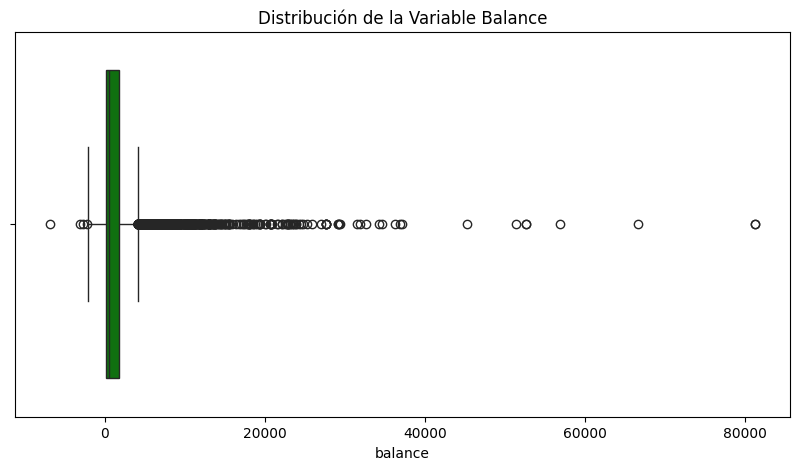

In [111]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df['balance'], orient='h', color='green')
plt.title('Distribución de la Variable Balance')
plt.show()

En esta visualización observo que existe una gran cantidad de valores que se encuentran fuera de rango, miraré un poco más en detalle.

Utilizaré la identificación de estos outliers (`balance`) mediante el método de IQR

In [112]:
# Percentiles
Q3 = df['balance'].quantile(0.75)
Q1 = df['balance'].quantile(0.25)

# IQR
IQR = Q3 - Q1

# Umbrales
superior = Q3 + (1.5 * IQR)
inferior = Q1 - (1.5 * IQR)
 
outliers_balance = df[(df['balance'] < inferior) | (df['balance'] > superior)]
outliers_balance

,age,job,marital,education,default,balance,housing,loan,deposit
9,28,services,single,secondary,no,5090,yes,no,yes
60,51,blue-collar,married,secondary,no,7180,yes,no,yes
61,41,blue-collar,divorced,secondary,no,5291,yes,no,yes
69,44,technician,married,tertiary,no,4580,yes,no,yes
71,29,management,married,tertiary,no,10576,no,no,yes
...,...,...,...,...,...,...,...,...,...
11073,34,blue-collar,married,primary,no,6718,no,no,no
11077,54,retired,divorced,tertiary,no,6102,yes,yes,no
11085,60,technician,married,primary,no,4243,yes,no,no
11086,42,admin.,married,secondary,no,6445,yes,no,no


El resultado arroja una gran cantidad de clientes con balances (saldos) que podrían considerarse inusuales, aunque al ser un saldo bancario esto indica que hay clientes con capacidad de ahorro distintos y también que este saldo es al momento de obtener los datos; para poder trabajar con estos clientes dentro del proyecto considero utilizar el método de "winsorizar" para tratar los outliers de la variable `balance`; con esto puedo saber si tiene algún efecto en el modelo. 

Creo un Dataframe adicional para poder realizar esta tarea sin necesidad de afectar el Dataframe original.

In [113]:
from scipy.stats.mstats import winsorize

df_winso = df.copy()

df_winso['balance'] = winsorize(df_winso['balance'], limits= [0.05, 0.05], inplace= True)


Creo un contenedor donde realizaré la visualización de los boxplots con y sin winzorizar para observar como quedan distribuidos los datos.

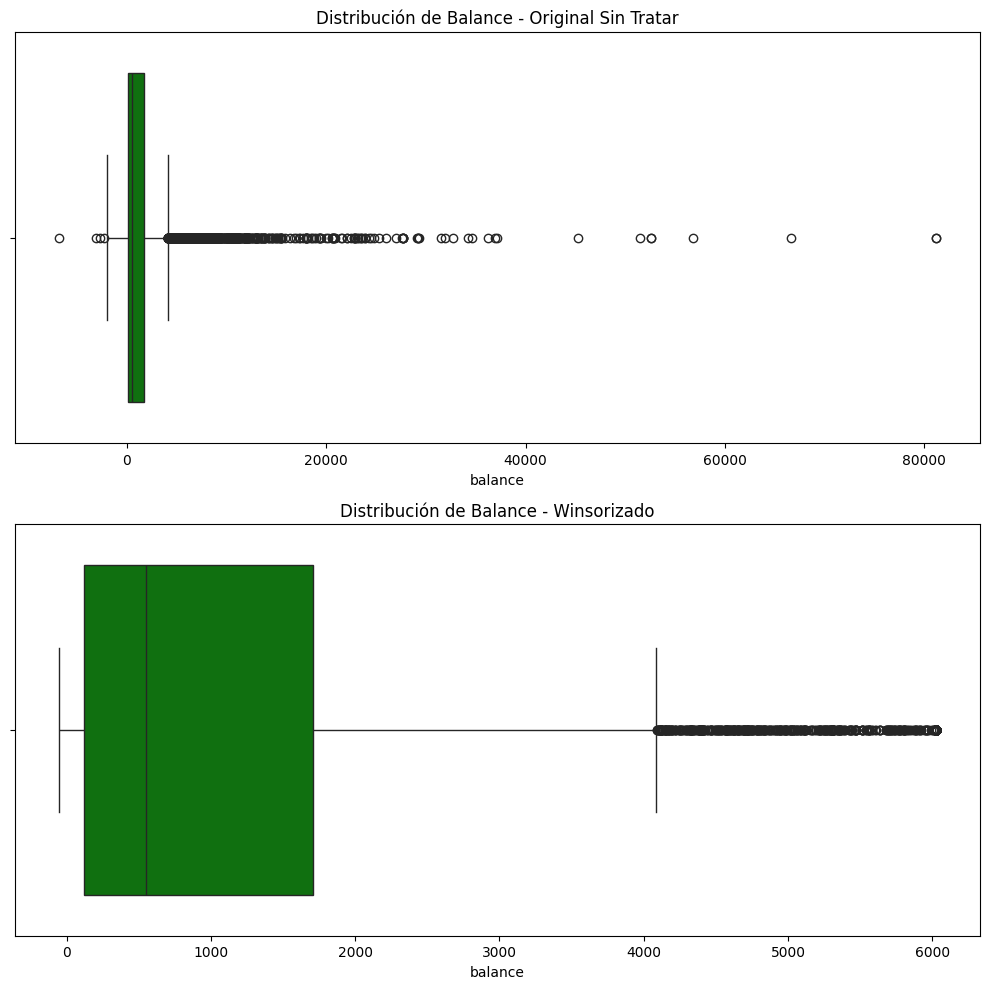

In [114]:
fig, axes = plt.subplots(2, 1, figsize = (10,10))

sns.boxplot(data = df, x = 'balance', ax = axes[0], color= 'green')
sns.boxplot(data = df_winso, x = 'balance', ax = axes[1], color= 'green')

axes[0].set_title('Distribución de Balance - Original Sin Tratar')
axes[1].set_title('Distribución de Balance - Winsorizado')

plt.tight_layout()


Ahora me interesa saber si `deposit` tiene alguna característica relevante como variable resultado respecto a otras variables (`default`, `loan`, `housing`, `deposit`); aunque mi proyecto está relacionado con Clustering me gustaría conocer la correlación que pueda haber; por lo que modifico las columnas que los contengan en valor numérico (yes/no por 0/1)

In [115]:
df['default'] = df['default'].map({'no': 0, 'yes': 1}).astype(int)
df['loan'] = df['loan'].map({'no': 0, 'yes': 1}).astype(int)
df['housing'] = df['housing'].map({'no': 0, 'yes': 1}).astype(int)
df['deposit'] = df['deposit'].map({'no': 0, 'yes': 1}).astype(int)
df.head()

,age,job,marital,education,default,balance,housing,loan,deposit
0,59,admin.,married,secondary,0,2343,1,0,1
1,56,admin.,married,secondary,0,45,0,0,1
2,41,technician,married,secondary,0,1270,1,0,1
3,55,services,married,secondary,0,2476,1,0,1
4,54,admin.,married,tertiary,0,184,0,0,1


Realizo una matriz de correlación para estudiar las variables.

Matriz de correlación:
              age   default   balance   housing      loan   deposit
age      1.000000 -0.011466  0.112223 -0.168479 -0.031547  0.034609
default -0.011466  1.000000 -0.060954  0.011076  0.076434 -0.040680
balance  0.112223 -0.060954  1.000000 -0.077092 -0.084589  0.081129
housing -0.168479  0.011076 -0.077092  1.000000  0.076761 -0.203888
loan    -0.031547  0.076434 -0.084589  0.076761  1.000000 -0.110580
deposit  0.034609 -0.040680  0.081129 -0.203888 -0.110580  1.000000


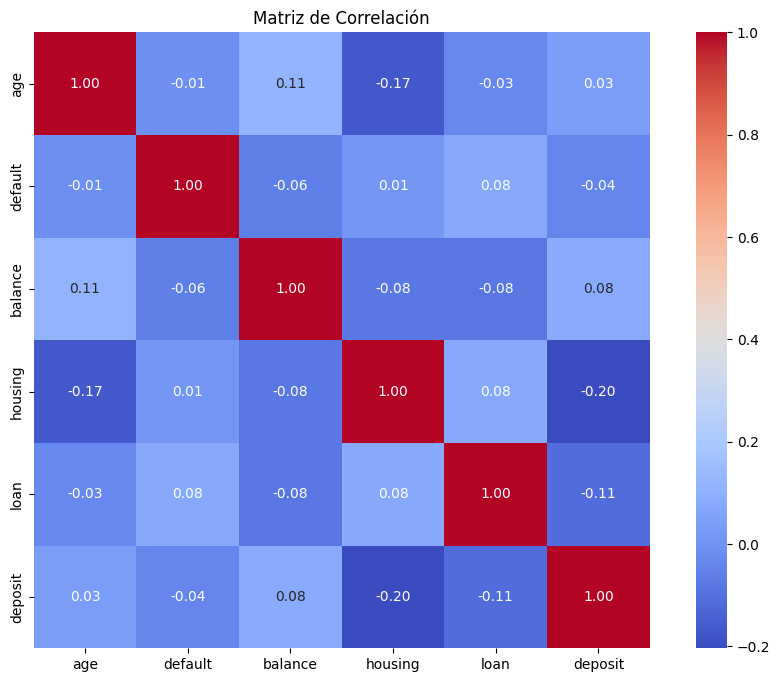

In [116]:
# Se seleccionan solo las columnas numéricas
numerical_df = df.select_dtypes(include=['number'])

# Se calcula la matriz de correlación
correlation_matrix = numerical_df.corr()

# Se imprime la matriz de correlación
print("Matriz de correlación:")
print(correlation_matrix)

# Se visualiza la matriz de correlación mediante un heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar=True)
plt.title('Matriz de Correlación')
plt.show()

En el mapa de calor no se observa una correlación entre las variables respecto a `deposit`, pero aún así las tendré en consideración durante el desarrollo de mi proyecto.

**Exploración de las variables categóricas**

Ahora quiero hacer un análisis exploratorio de las variables categóricas con respecto a `deposit`, para esto haré uso de tablas de frecuencia/proporciones y gráficos de mosaico/conteo.

Utilizaré Tablas de Contigencia(frecuencia cruzada); a través de estas me permitirá ver las proporciones de cada categoría en relación con el valor de la variable `deposit`.

In [117]:
# Para poder una visualización más clara de la relación vuelvo a convertir a valor yes/no la Variable `deposit`

df['deposit'] = df['deposit'].replace({1 : 'yes', 0 : 'no'}).astype(str)

In [118]:
pd.crosstab(df['job'], df['deposit'], normalize='index')

deposit,no,yes
job,,
admin.,0.526987,0.473013
blue-collar,0.635802,0.364198
entrepreneur,0.625000,0.375000
housemaid,0.602190,0.397810
management,0.492985,0.507015
retired,0.336761,0.663239
self-employed,0.538272,0.461728
services,0.600217,0.399783
student,0.252778,0.747222


In [119]:
pd.crosstab(df['marital'], df['deposit'], normalize='index')

deposit,no,yes
marital,,
divorced,0.519752,0.480248
married,0.565874,0.434126
single,0.456794,0.543206


In [120]:
pd.crosstab(df['education'], df['deposit'], normalize='index')

deposit,no,yes
education,,
primary,0.606000,0.394000
secondary,0.552656,0.447344
tertiary,0.458910,0.541090
unknown,0.491935,0.508065


Ahora utilizo gráficos de moisaco para tener una vista de la distribución de las proporciones de las categorías entre las dos variables

<Figure size 1000x1000 with 0 Axes>

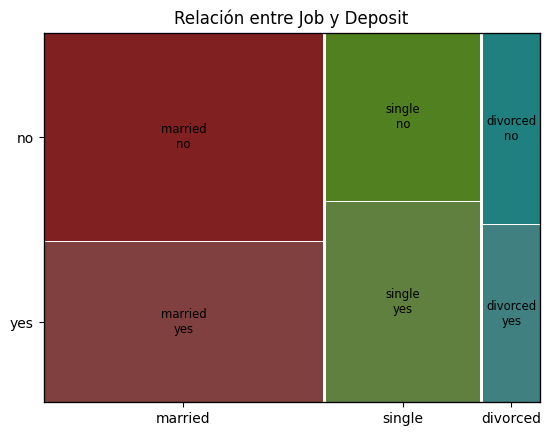

In [122]:
from statsmodels.graphics.mosaicplot import mosaic
import matplotlib.pyplot as plt

pd.crosstab(df['marital'], df['deposit'])

plt.figure(figsize=(10, 10))
mosaic(df, ['marital', 'deposit'], title='Relación entre Job y Deposit')
plt.show()

<Figure size 1000x1000 with 0 Axes>

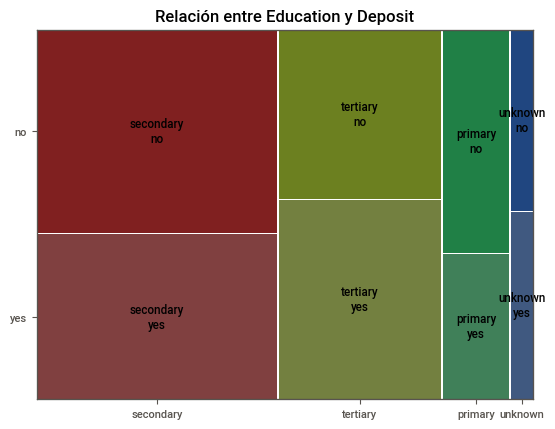

In [104]:
pd.crosstab(df['education'], df['deposit'])

plt.figure(figsize=(10, 10))
mosaic(df, ['education', 'deposit'], title='Relación entre Education y Deposit')
plt.show()

<Figure size 1000x1000 with 0 Axes>

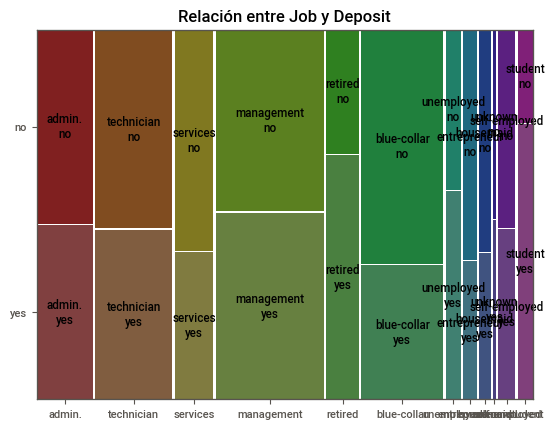

In [105]:
import pandas as pd
from statsmodels.graphics.mosaicplot import mosaic
import matplotlib.pyplot as plt

pd.crosstab(df['job'], df['deposit'])

plt.figure(figsize=(10, 10))
mosaic(df, ['job', 'deposit'], title='Relación entre Job y Deposit')
plt.show()

En este gráfico las distribuciones se ven muy apiladas en el caso de `job`, pero en los siguientes gráficos se pueden observar mejor esta distribución.

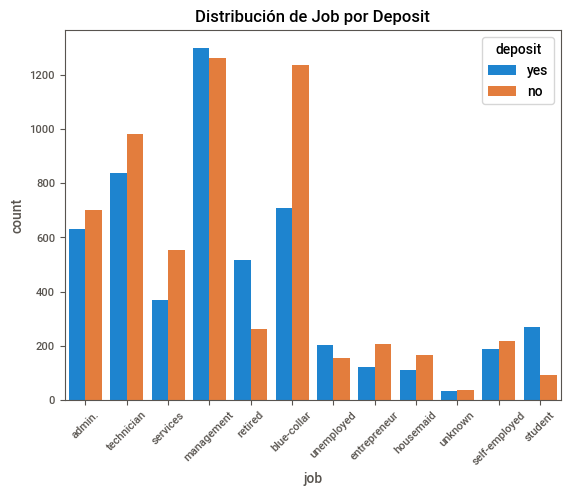

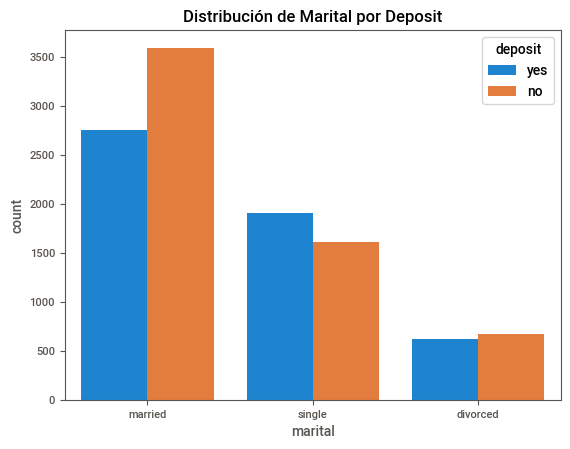

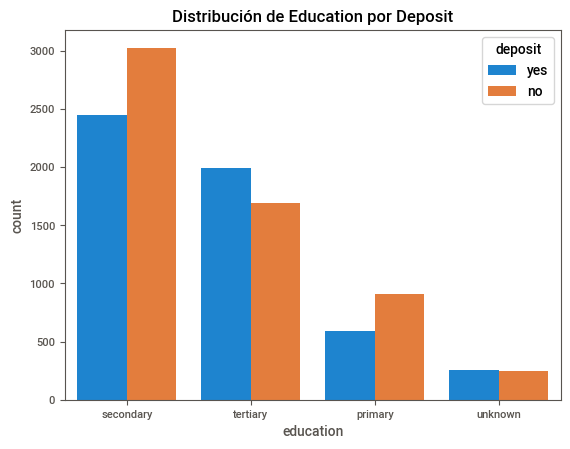

In [106]:
# Gráficos de barras para ver la distribución de 'job' en relación a 'deposit'

sns.countplot(data=df, x='job', hue='deposit')
plt.xticks(rotation=45)
plt.title('Distribución de Job por Deposit')
plt.show()

# Repetir para otras variables
sns.countplot(data=df, x='marital', hue='deposit')
plt.title('Distribución de Marital por Deposit')
plt.show()

sns.countplot(data=df, x='education', hue='deposit')
plt.title('Distribución de Education por Deposit')
plt.show()


Análisis Estadístico mediante Chi-Cuadrado de Independencia. Eso me puede ayudar también a determinar si existe una relación significativa entre las variables categóricas y `deposit`. Si el valor de p es menor que un umbral como 0.05, se puede considerar que existe una relación significativa entre estas variables.

In [107]:
from scipy.stats import chi2_contingency

# Tabla de contingencia para la variable 'job' con 'deposit'
contingency_table = pd.crosstab(df['job'], df['deposit'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi2: {chi2}, p-value: {p}")

if p < 0.05:
            print(f"Existe una asociación significativa entre 'job' y 'deposit'.")
else:
            print(f'No se encontró una asociación significativa entre job y "deposit".')


Chi2: 378.0752558664989, p-value: 2.741689587081072e-74
Existe una asociación significativa entre 'job' y 'deposit'.


In [108]:
from scipy.stats import chi2_contingency

# Tabla de contingencia para la variable 'marital' con 'deposit'
contingency_table = pd.crosstab(df['marital'], df['deposit'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi2: {chi2}, p-value: {p}")

if p < 0.05:
            print(f"Existe una asociación significativa entre 'marital' y 'deposit'.")
else:
            print(f'No se encontró una asociación significativa entre marital y "deposit".')



Chi2: 108.29928062639624, p-value: 3.041655436423758e-24
Existe una asociación significativa entre 'marital' y 'deposit'.


In [109]:
from scipy.stats import chi2_contingency

# Tabla de contingencia para la variable 'education' con 'deposit'
contingency_table = pd.crosstab(df['education'], df['deposit'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi2: {chi2}, p-value: {p}")

if p < 0.05:
            print(f"Existe una asociación significativa entre 'education' y 'deposit'.")
else:
            print(f'No se encontró una asociación significativa entre education y "deposit".')

Chi2: 122.99190315139273, p-value: 1.7499066703782653e-26
Existe una asociación significativa entre 'education' y 'deposit'.


Del análisis realizado Chi-Cuadrado se puede destacar una asociación significativa entre las variables categóricas y la variable `deposit`. Durante el avance del proyecto podré conocer su relevancia y su aplicación en el desarrollo del modelo basado en Clustering, ya que forman parte de las variables con las que trabajaré.

Para finalizar el análisis utilizaré Sweetbiz para conocer su utilidad como una herramienta que permita tener una visión preliminar de los datos dentro de un dataset previo a su exploración exhaustiva.

In [110]:
import sweetviz as sv
report = sv.analyze(df)
report.show_html('EDA_report.html')

                                             |          | [  0%]   00:00 -> (? left)

Report EDA_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


# RESUMEN 

Del análisis exploratorio del dataset se ha podido observar que había pocos valores nulos, se trataron de la manera que no pudiera afectar al conjunto respetando los criterios recomendados en estos casos. 

En los outliers se encontró una alta dispersión en los datos, aunque puede pensarse que son valores atípicos, en el caso de las edades(`age`) no consideré necesario tomar ninguna medida sobre esta variable, pues he encontrado clientes mayores que han contratado el servicio ofertado y no tendrían que ser descartados, ya que pueden tener un lugar dentro de la clasificación que se busca obtener. 

En el caso de `balance`, aunque he realizado una winsorización para conocer el alcance de su uso en esta variable, aún no considero necesario hacer algún tratamiento de los valores sin entender el alcance que pueda tener el desarrollo del proyecto.

Para la correlación de los datos he trabajado con la variable deposit que es la variable resultado del dataset y me ha permitido estudiar con detalle su relación con las variables. Para las variables numéricas no mostraban una relación notable con `deposit`; con las variables categóricas si que he observado asociaciones que son significativas, por lo que no consideré hacer ajustes en ellas. 